In [1]:
import tensorflow as tf  #Data augmentation
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)

In [3]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dataset = train_datagen.flow_from_directory(
    'C:/Users/frat5/Desktop/jupyter/archive1/images/train',  
    class_mode='binary',
    batch_size=32,
    target_size=(48, 48),
    color_mode='grayscale')

validation_dataset = validation_datagen.flow_from_directory(
    'C:/Users/frat5/Desktop/jupyter/archive1/images/validation', 
    class_mode='binary',
    batch_size=32,
    target_size=(48, 48),
    color_mode='grayscale')

Found 11157 images belonging to 2 classes.
Found 2785 images belonging to 2 classes.


In [5]:
model = models.Sequential([
    layers.Input(shape=(48, 48, 1)), 
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(
    train_dataset, 
    epochs=50, 
    validation_data=validation_dataset
)

Epoch 1/50
  1/349 ━━━━━━━━━━━━━━━━━━━━ 6:58 1s/step - accuracy: 0.6562 - loss: 0.6875

C:\Users\frat5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


349/349 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.6285 - loss: 0.6684 - val_accuracy: 0.6564 - val_loss: 0.6407
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.6450 - loss: 0.6418 - val_accuracy: 0.6406 - val_loss: 0.6381
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6576 - loss: 0.6318 - val_accuracy: 0.6575 - val_loss: 0.6209
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6482 - loss: 0.6285 - val_accuracy: 0.6718 - val_loss: 0.6105
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6547 - loss: 0.6288 - val_accuracy: 0.6779 - val_loss: 0.6017
Epoch 6/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6528 - loss: 0.6251 - val_accuracy: 0.6840 - val_loss: 0.6009
Epoch 7/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6561 - loss: 0.6256 - val_accuracy: 0.6869 - val_loss: 0.5937
Epoch 8/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6735 - loss: 0.6157 - val_accurac

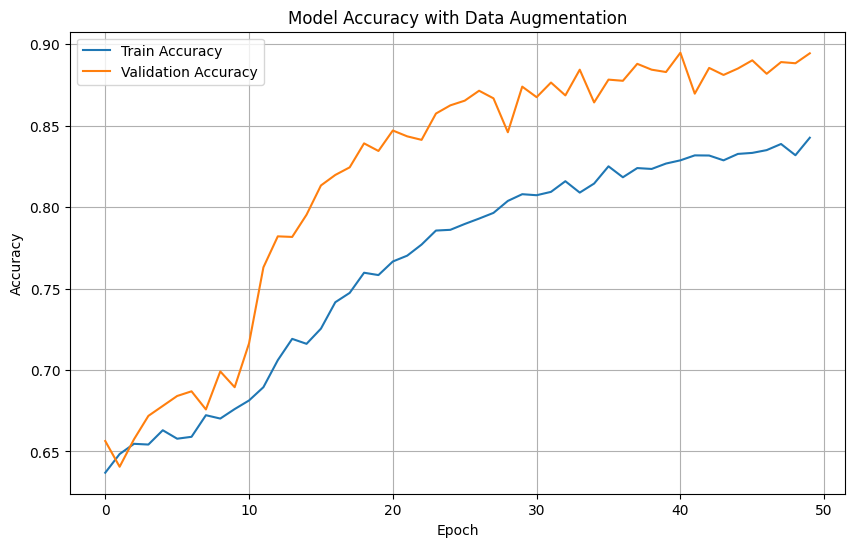

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Save the model with the '.keras' extension
model.save('haaugmentation_model.keras')  # This specifies the Keras native format